# Wine Quality Classification

# Context


The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).


# Attribute Information

Input variables (based on physicochemical tests):
    
1 - fixed acidity

2 - volatile acidity

3 - citric acid

4 - residual sugar

5 - chlorides

6 - free sulfur dioxide

7 - total sulfur dioxide

8 - density

9 - pH

10 - sulphates

11 - alcohol

Output variable (based on sensory data):

12 - quality (score between 0 and 10)

# Objective

Use machine learning to determine which physiochemical properties make a wine 'good'!

# Importing Important Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
## Loading the dataset
df=pd.read_csv('winequality.csv')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
## Check shape of dataset
df.shape

(1599, 12)

1- We have 1599 rows and 12 columns including Target column(Quality)

In [5]:
## Check datatype
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

1- All features have a correct datatype. All ok

In [6]:
## Getting Info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


1- There is no null value present in our dataset.

In [7]:
## Checking null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

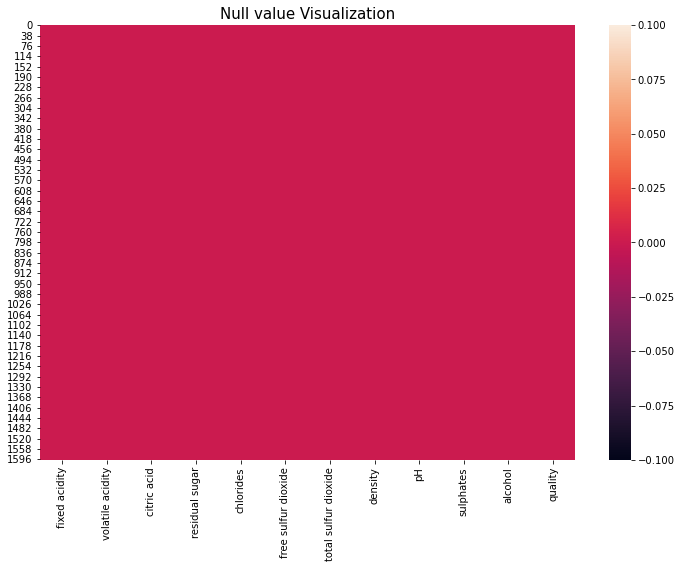

In [8]:
plt.figure(figsize=(12,8))
plt.title('Null value Visualization',fontsize=15)
sns.heatmap(df.isnull())
plt.show()

1- There is no null values in our dataset.

In [9]:
## Getting Statistical Summary
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Observation

1-Outliers prensent in total sulfur dioxide.

2-Shows all featurs are appoximatly Normal Distributed except sulfur dioxide.

<AxesSubplot:title={'center':'Correlation Heatmap'}>

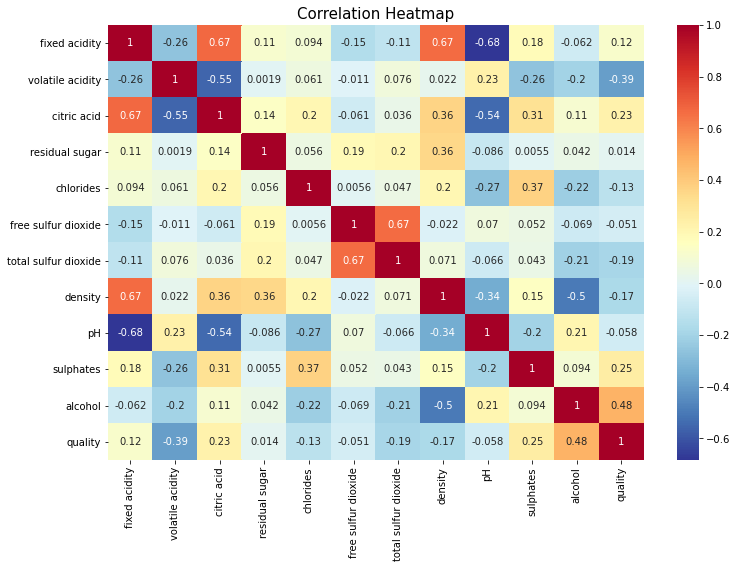

In [10]:
plt.figure(figsize=(12,8))
plt.title('Correlation Heatmap',fontsize=15)
sns.heatmap(df.corr(),annot=True,cmap='RdYlBu_r')

# Checking Distribution

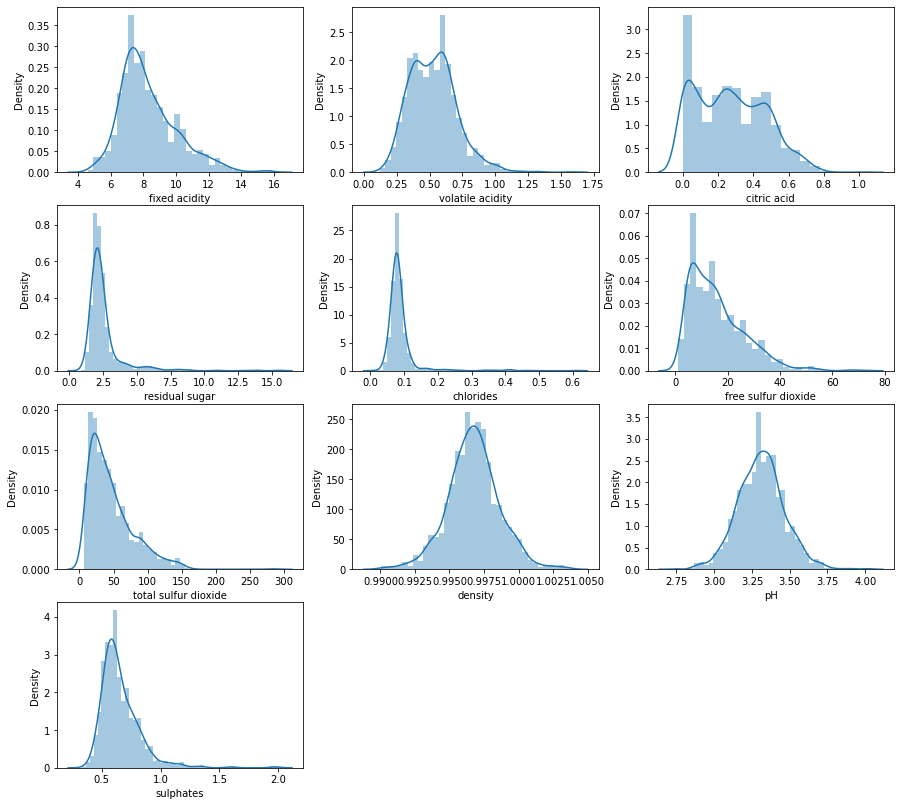

In [11]:
## Distribution of Each Continuous Attribute
plt.figure(figsize=(15,14))
plot=1
for i in df:
    if plot<=10:
        plt.subplot(4,3,plot)
        sns.distplot(df[i])
        plt.xlabel(i)
    plot=plot+1
plt.show()        

# Checking Outliers

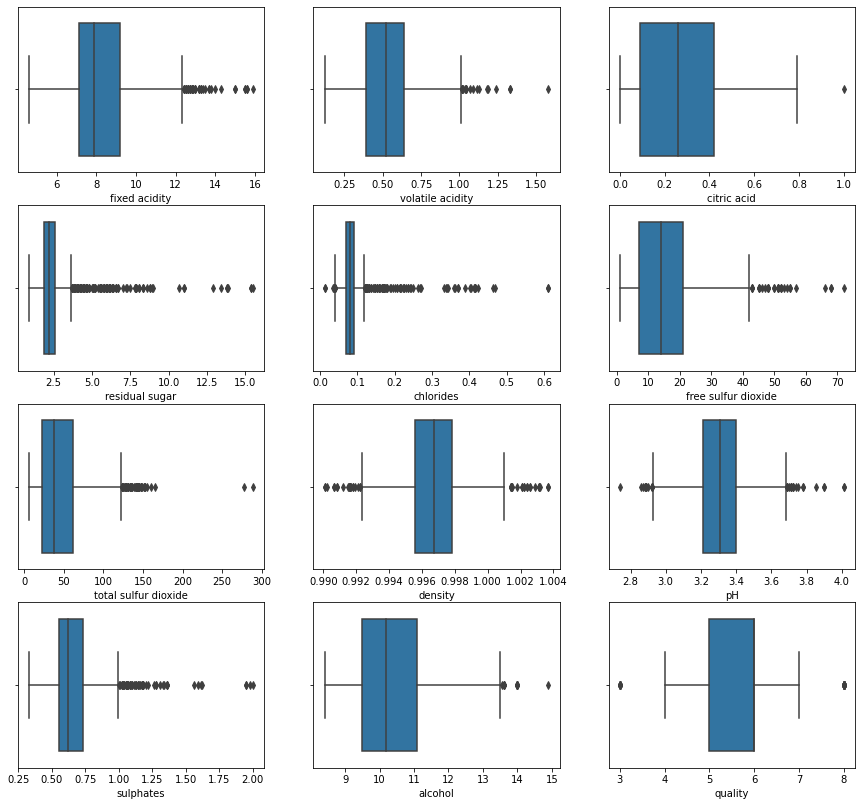

In [12]:
## Distribution of Each Continuous Attribute ## Select only float data types
plt.figure(figsize=(15,14))
plot=1
for i in df:
    if plot<=12:
        plt.subplot(4,3,plot)
        sns.boxplot(df[i])
        plt.xlabel(i)
    plot=plot+1
plt.show()        

In [13]:
from scipy.stats import zscore
z_score=zscore(df)
print(df.shape)
df_1=df.loc[(z_score<3.5).all(axis=1)]
print(df_1.shape)

(1599, 12)
(1518, 12)


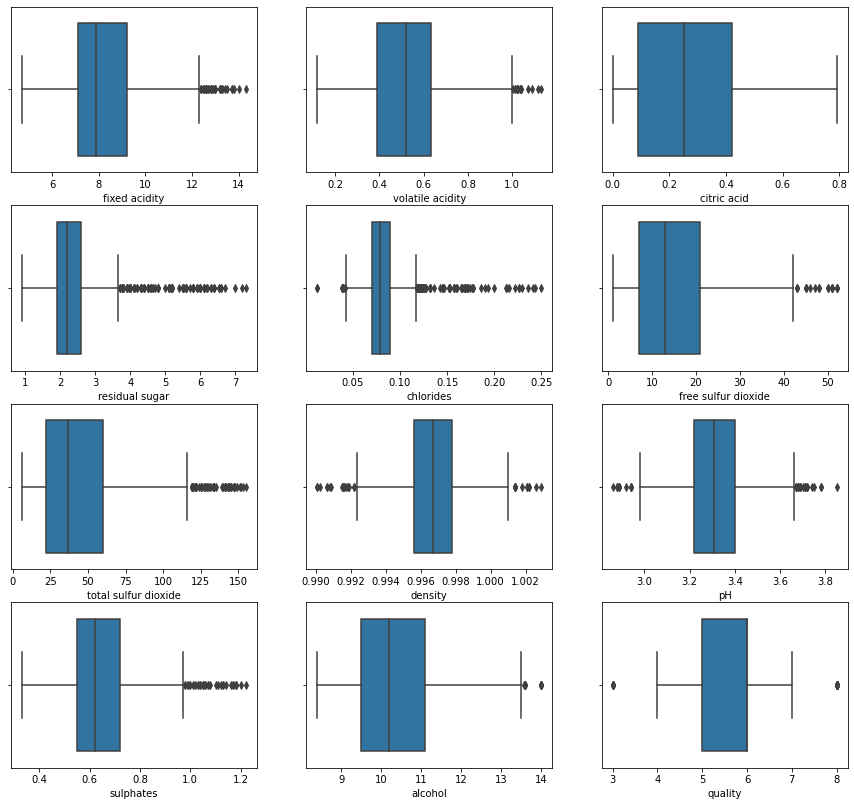

In [14]:
## Alter removal of  very distinct datapoints
plt.figure(figsize=(15,14))
plot=1
for i in df_1:
    if plot<=12:
        plt.subplot(4,3,plot)
        sns.boxplot(df_1[i])
        plt.xlabel(i)
    plot=plot+1
plt.show() 

# Skewness

In [15]:
df_1.skew()

fixed acidity           0.838429
volatile acidity        0.444226
citric acid             0.299264
residual sugar          2.452040
chlorides               2.635851
free sulfur dioxide     0.989073
total sulfur dioxide    1.198312
density                -0.078641
pH                      0.153646
sulphates               1.012281
alcohol                 0.833944
quality                 0.264507
dtype: float64

In [16]:
## If skewness must be -.5<skew<.5
for col in df_1:
    if df_1[col].skew()>=.5:
        df_1[col]=np.cbrt(df_1[col])

In [17]:
## Skewness Removed
df_1.skew()

fixed acidity           0.513421
volatile acidity        0.444226
citric acid             0.299264
residual sugar          1.624731
chlorides               1.064674
free sulfur dioxide     0.175154
total sulfur dioxide    0.353578
density                -0.078641
pH                      0.153646
sulphates               0.594450
alcohol                 0.704530
quality                 0.264507
dtype: float64

In [18]:
## Checking unique values in Target column
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [19]:
## Set a cutoff to convert multiclass class classification to Binary Class.
bins=[2,6,9]
labels=['Bad','Good']
df_1['quality']=pd.cut(df_1['quality'],bins=bins,labels=labels)
df_1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1.948695,0.70,0.00,1.238562,0.423582,2.223980,3.239612,0.9978,3.51,0.824257,2.110454,Bad
1,1.983192,0.88,0.00,1.375069,0.461044,2.924018,4.061548,0.9968,3.20,0.879366,2.139975,Bad
2,1.983192,0.76,0.04,1.320006,0.451436,2.466212,3.779763,0.9970,3.26,0.866239,2.139975,Bad
3,2.237378,0.28,0.56,1.238562,0.421716,2.571282,3.914868,0.9980,3.16,0.833955,2.139975,Bad
4,1.948695,0.70,0.00,1.238562,0.423582,2.223980,3.239612,0.9978,3.51,0.824257,2.110454,Bad


In [20]:
df_1['quality'].value_counts()

Bad     1311
Good     207
Name: quality, dtype: int64

<AxesSubplot:title={'center':'Distribution of Target'}, xlabel='quality', ylabel='count'>

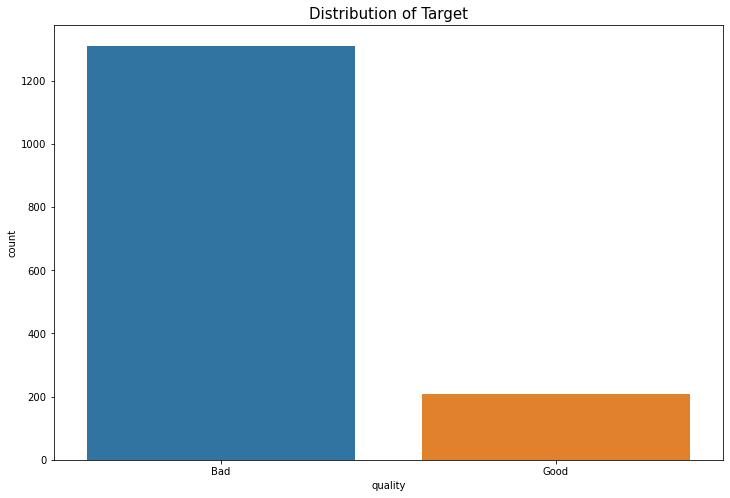

In [21]:
plt.figure(figsize=(12,8))
plt.title('Distribution of Target',fontsize=15)
sns.countplot(df_1['quality'])

it shows our distribution is imbalance.

# Encoding the target Variable

In [22]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_1['quality']=le.fit_transform(df_1['quality'])

In [23]:
df_1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1.948695,0.70,0.00,1.238562,0.423582,2.223980,3.239612,0.9978,3.51,0.824257,2.110454,0
1,1.983192,0.88,0.00,1.375069,0.461044,2.924018,4.061548,0.9968,3.20,0.879366,2.139975,0
2,1.983192,0.76,0.04,1.320006,0.451436,2.466212,3.779763,0.9970,3.26,0.866239,2.139975,0
3,2.237378,0.28,0.56,1.238562,0.421716,2.571282,3.914868,0.9980,3.16,0.833955,2.139975,0
4,1.948695,0.70,0.00,1.238562,0.423582,2.223980,3.239612,0.9978,3.51,0.824257,2.110454,0


# Assigning X and Y

In [24]:
x=df_1.drop(['quality'],axis=1)
y=df_1[['quality']]

In [25]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1.948695,0.700,0.00,1.238562,0.423582,2.223980,3.239612,0.99780,3.51,0.824257,2.110454
1,1.983192,0.880,0.00,1.375069,0.461044,2.924018,4.061548,0.99680,3.20,0.879366,2.139975
2,1.983192,0.760,0.04,1.320006,0.451436,2.466212,3.779763,0.99700,3.26,0.866239,2.139975
3,2.237378,0.280,0.56,1.238562,0.421716,2.571282,3.914868,0.99800,3.16,0.833955,2.139975
4,1.948695,0.700,0.00,1.238562,0.423582,2.223980,3.239612,0.99780,3.51,0.824257,2.110454
...,...,...,...,...,...,...,...,...,...,...,...
1594,1.837091,0.600,0.08,1.259921,0.448140,3.174802,3.530348,0.99490,3.45,0.833955,2.189760
1595,1.806969,0.550,0.10,1.300591,0.395789,3.391211,3.708430,0.99512,3.52,0.912581,2.237378
1596,1.846915,0.510,0.13,1.320006,0.423582,3.072317,3.419952,0.99574,3.42,0.908560,2.223980
1597,1.806969,0.645,0.12,1.259921,0.421716,3.174802,3.530348,0.99547,3.57,0.892112,2.168703


In [26]:
y.value_counts()

quality
0          1311
1           207
dtype: int64

In [27]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_scaled=ss.fit_transform(x)
x_scaled=pd.DataFrame(x_scaled,columns=x.columns)
x_scaled

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.506616,1.008962,-1.386904,-0.609450,-0.211354,-0.303925,-0.188307,0.605782,1.329324,-0.620354,-1.006149
1,-0.246527,2.053594,-1.386904,0.352108,0.790531,1.034465,0.868384,0.055486,-0.802105,0.325210,-0.596604
2,-0.246527,1.357173,-1.177981,-0.035757,0.533572,0.159194,0.506118,0.165546,-0.389571,0.099978,-0.596604
3,1.669875,-1.428513,1.538023,-0.609450,-0.261260,0.360075,0.679810,0.715842,-1.077129,-0.453954,-0.596604
4,-0.506616,1.008962,-1.386904,-0.609450,-0.211354,-0.303925,-0.188307,0.605782,1.329324,-0.620354,-1.006149
...,...,...,...,...,...,...,...,...,...,...,...
1513,-1.348047,0.428611,-0.969058,-0.458999,0.445442,1.513936,0.185468,-0.990076,0.916789,-0.453954,0.094065
1514,-1.575146,0.138436,-0.864596,-0.172515,-0.954670,1.927685,0.414411,-0.869011,1.398079,0.895110,0.754681
1515,-1.273978,-0.093705,-0.707903,-0.035757,-0.211354,1.317996,0.043541,-0.527827,0.710522,0.826130,0.568812
1516,-1.575146,0.689769,-0.760134,-0.458999,-0.261260,1.513936,0.185468,-0.676407,1.741858,0.543911,-0.198057


# Feature Importance

[0.07128764 0.10060831 0.09187941 0.0765035  0.07220218 0.06825011
 0.08320694 0.08750424 0.06748092 0.11424353 0.16683323]


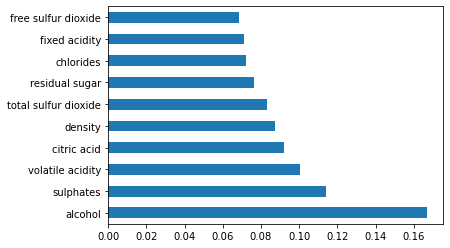

In [28]:
from sklearn.ensemble import ExtraTreesClassifier
mod=ExtraTreesClassifier()
mod.fit(x,y)
print(mod.feature_importances_)
feat_importances=pd.Series(mod.feature_importances_,index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

# Model Building|

In [29]:
from sklearn.model_selection import train_test_split,cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score,f1_score,confusion_matrix,classification_report,accuracy_score


In [30]:
def max_aucroc_score(clf,x,y):
    maxroc_auc=0
    for i in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i,stratify=y)
        x_train,y_train=SMOTE().fit_resample(x_train,y_train)
        clf.fit(x_train,y_train)
        pred=clf.predict(x_test)
        roc_score=roc_auc_score(y_test,pred)
        if roc_score>maxroc_auc:
            maxroc_auc=roc_score
            final_r=i
    print('max Roc_auc score corresponding to',final_r,'is',maxroc_auc)
    return final_r
        

In [31]:
## Logistic Regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
max_aucroc_score(lr,x,y)

max Roc_auc score corresponding to 47 is 0.8428544931837151


47

In [32]:
print('Mean Cross Validation score for Logistic Regression',cross_val_score(lr,x,y,scoring='roc_auc').mean())
print('Standard Deviation of cross Validation score',cross_val_score(lr,x,y,scoring='roc_auc').std())

Mean Cross Validation score for Logistic Regression 0.8566022597129663
Standard Deviation of cross Validation score 0.03012202593270231


In [33]:
## Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
max_aucroc_score(dt,x,y)

max Roc_auc score corresponding to 60 is 0.857599925809144


60

In [34]:
print('Mean Cross Validation score for Decision Tree Classifier',cross_val_score(dt,x,y,scoring='roc_auc').mean())
print('Standard Deviation of cross Validation score',cross_val_score(dt,x,y,scoring='roc_auc').std())

Mean Cross Validation score for Decision Tree Classifier 0.674021905585124
Standard Deviation of cross Validation score 0.04692492978762178


In [35]:
## KNN
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
max_aucroc_score(knn,x,y)

max Roc_auc score corresponding to 78 is 0.8447556338681256


78

In [36]:
print('Mean Cross Validation score for KNN Classifier',cross_val_score(knn,x,y,scoring='roc_auc').mean())
print('Standard Deviation of cross Validation score',cross_val_score(knn,x,y,scoring='roc_auc').std())

Mean Cross Validation score for KNN Classifier 0.7498185841756582
Standard Deviation of cross Validation score 0.04474995132689194


In [37]:
### Support Vector Machine
from sklearn.svm import SVC
svc=SVC()
max_aucroc_score(svc,x,y)

max Roc_auc score corresponding to 72 is 0.8070574051748123


72

In [38]:
print('Mean Cross Validation score for Support Vector ',cross_val_score(svc,x,y,scoring='roc_auc').mean())
print('Standard Deviation of cross Validation score',cross_val_score(svc,x,y,scoring='roc_auc').std())

Mean Cross Validation score for Support Vector  0.8522121520023929
Standard Deviation of cross Validation score 0.023080137585754557


In [39]:
### Random Forest
from sklearn.ensemble import RandomForestClassifier
rdf=RandomForestClassifier()
max_aucroc_score(rdf,x,y)

max Roc_auc score corresponding to 60 is 0.8804136140220716


60

In [40]:
print('Mean Cross Validation score for Random Forest ',cross_val_score(rdf,x,y,scoring='roc_auc').mean())
print('Standard Deviation of cross Validation score',cross_val_score(rdf,x,y,scoring='roc_auc').std())

Mean Cross Validation score for Random Forest  0.8606027272151431
Standard Deviation of cross Validation score 0.02310890687348245


In [41]:
## Gradient Boost
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
max_aucroc_score(gb,x,y)

max Roc_auc score corresponding to 73 is 0.8652044885467867


73

In [42]:
print('Mean Cross Validation score for Gradient Boost ',cross_val_score(gb,x,y,scoring='roc_auc').mean())
print('Standard Deviation of cross Validation score',cross_val_score(gb,x,y,scoring='roc_auc').std())

Mean Cross Validation score for Gradient Boost  0.8683339045638198
Standard Deviation of cross Validation score 0.038859323006796766


In [43]:
## Adaboost
from sklearn.ensemble import AdaBoostClassifier
adb=AdaBoostClassifier(base_estimator=DecisionTreeClassifier())
max_aucroc_score(adb,x,y)

max Roc_auc score corresponding to 82 is 0.8614022071779652


82

In [44]:
print('Mean Cross Validation score for AdaBoost ',cross_val_score(adb,x,y,scoring='roc_auc').mean())
print('Standard Deviation of cross Validation score',cross_val_score(adb,x,y,scoring='roc_auc').std())

Mean Cross Validation score for AdaBoost  0.6629532032950476
Standard Deviation of cross Validation score 0.05604301330920448


# Hence, Gradient Boost classifier is our best model.

# Hyperparameter Tuning

In [45]:
from sklearn.model_selection import GridSearchCV
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=72,test_size=.20,stratify=y)
x_train,y_train=SMOTE().fit_resample(x_train,y_train)

In [46]:
param={'n_estimators':[50,100,200,500],'learning_rate':[.001,.01,.1,1,10],'min_samples_split':np.arange(2,10)}
clf=GridSearchCV(gb,param,scoring='roc_auc',cv=5)
clf.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'n_estimators': [50, 100, 200, 500]},
             scoring='roc_auc')

In [47]:
clf.best_params_

{'learning_rate': 1, 'min_samples_split': 6, 'n_estimators': 500}

In [55]:
boost=GradientBoostingClassifier(learning_rate= 1,min_samples_split= 6,n_estimators= 500)
boost.fit(x_train,y_train)
pred1=boost.predict(x_test)
print('New Accuracy',accuracy_score(y_test,pred1))
print('New roc_auc score',roc_auc_score(y_test,pred1))

New Accuracy 0.9144736842105263
New roc_auc score 0.8270425670036168


In [57]:
print('Accucacy score',accuracy_score(y_test,pred1))
print('roc_auc_socre',roc_auc_score(y_test,pred1))
print('Confusion matrix',confusion_matrix(y_test,pred1))
print('Classification report',classification_report(y_test,pred1))

Accucacy score 0.9144736842105263
roc_auc_socre 0.8270425670036168
Confusion matrix [[249  14]
 [ 12  29]]
Classification report               precision    recall  f1-score   support

           0       0.95      0.95      0.95       263
           1       0.67      0.71      0.69        41

    accuracy                           0.91       304
   macro avg       0.81      0.83      0.82       304
weighted avg       0.92      0.91      0.92       304



# Save the Model

In [58]:
import joblib
joblib.dump(boost,'P3winequalityboost.pkl')


['P3winequalityboost.pkl']

# Loading the model

In [59]:
model=joblib.load('P3winequalityboost.pkl')
prediction=model.predict(x_test)


In [60]:
print(accuracy_score(y_test,prediction))
print(roc_auc_score(y_test,prediction))

0.9144736842105263
0.8270425670036168


In [61]:
## Creating the dataframe
prediction=pd.DataFrame(prediction)

In [62]:
##saving the  prediction
prediction.to_csv('WinequalityResult.csv')